In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
%matplotlib inline

최소공법으로 기월기와 y절편을 계산할 데이터를 만든다

In [2]:
x = [2, 4, 6, 8] # 공부시간
y = [81, 93, 91, 97] # 시험점수

공부시간과 시험점수 데이터를 판다스 데이터프레임으로 만든다

In [3]:
df = pd.DataFrame(columns=['x', 'y']) # 빈 데이터프레임 생성
# 빈 데이터프레임에 데이터를 넣을 떄는 lco[index]를 사용해서 리스트 형태의 데이터를 넣어주면 된다.
df.loc[0] = [2, 81]
df.loc[1] = [4, 93]
df.loc[2] = [6, 91]
df.loc[3] = [8, 97]
df

,x,y
0,2,81
1,4,93
2,6,91
3,8,97


공부시간과 시험점수 시각화

findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.


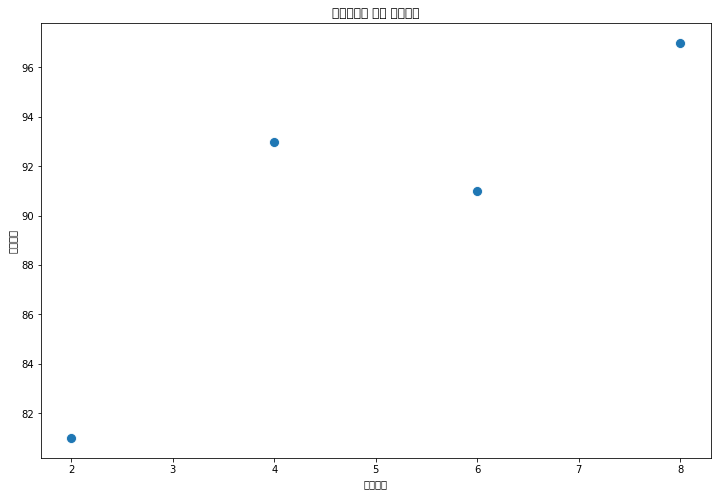

In [4]:
plt.figure(figsize=[12, 8])
sns.scatterplot(data=df, x= 'x', y= 'y', s = 100)
plt.title('공부시간에 따른 시험성적')
plt.xlabel('공부시간')
plt.ylabel('시험성적')
plt.show()

기울기 공식 => $\frac{\sum_{i=0}^{n-1}(x_i - \bar x)(y_i - \bar y)}{\sum_{i=0}^{n-1}(x_i - \bar x)^2}$

In [5]:
mean_x = np.mean(x) # 공부시간의 평균
mean_y = np.mean(y) # 시험점수의 평균 => 실제값
print('공부시간의 평균: {}, 시험점수의 평균: {}'.format(mean_x, mean_y))

공부시간의 평균: 5.0, 시험점수의 평균: 90.5


기울기 공식의 분자를 계산하는 함수

In [6]:
def top(x, mean_x, y, mean_y):
    total = 0.0
    for i in range (len(x)):
         total += (x[i] - mean_x) * (y[i] - mean_y)
    return total

dividend = top(x, mean_x, y, mean_y)
print(dividend)

46.0


기울기 공식의 분모를 계산하는 함수

In [7]:
def bottom(x, mean_x):
    total = 0.0
    for i in range (len(x)):
        total += (x[i] - mean_x) ** 2
    return total

divisor = bottom(x, mean_x)
print(divisor)

20.0


In [8]:
print('기울기 공식의 분자: {}, 기울기 공식의 분모: {}'.format(dividend, divisor))
a = dividend/divisor
print('기울기: {}'.format(a))

기울기 공식의 분자: 46.0, 기울기 공식의 분모: 20.0
기울기: 2.3


y절편 공식 => $\bar y - (\bar x * a)$

In [9]:
b = mean_y - (mean_x * a)
print('y절편: {}'.format(b))

y절편: 79.0
